In [1]:
import sklearn.datasets
# conda install -c conda-forge scikit-learn
from sklearn import neighbors, tree, cluster
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import numpy as np
import itertools as it

## Loading example data: Iris plants dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [2]:
iris = sklearn.datasets.load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.data.shape, iris.data[:5]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

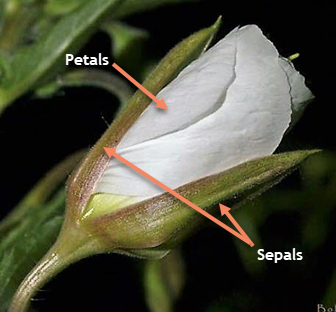

In [12]:
from IPython import display
display.Image("https://plantid.net/Classic/Glossary/Sepal_files/image001.png")

In [7]:
iris.target.shape, np.unique(iris.target, return_counts=True)

((150,), (array([0, 1, 2]), array([50, 50, 50])))

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Plot feature combinations + labels

In [17]:
def draw_scatter(data, labels, x_feature, y_feature):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=labels, alpha=0.5, s=100)
    plt.xlabel(iris.feature_names[x_feature]), plt.ylabel(iris.feature_names[y_feature])
    plt.show()

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


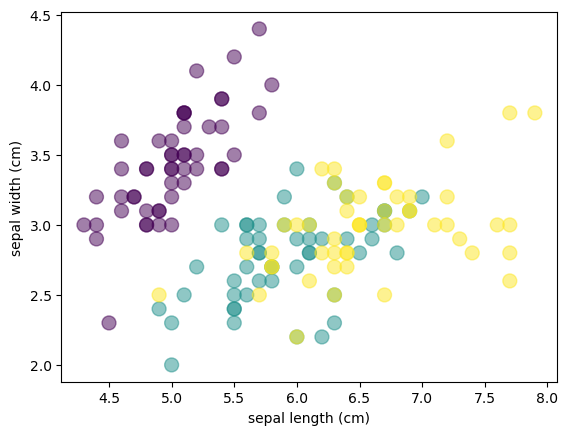

(0, 'sepal length (cm)') (2, 'petal length (cm)')


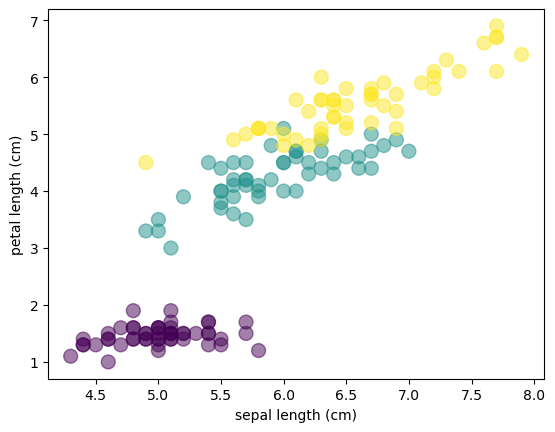

(0, 'sepal length (cm)') (3, 'petal width (cm)')


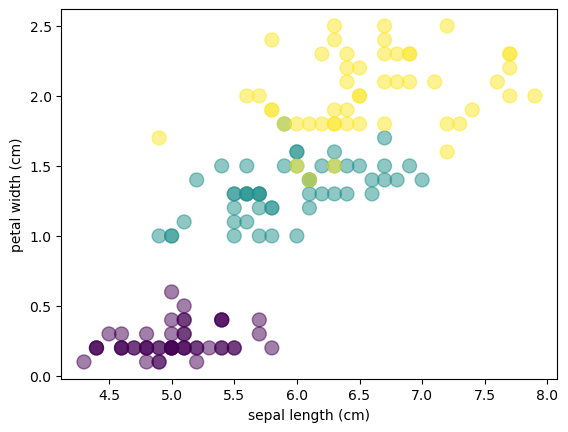

(1, 'sepal width (cm)') (2, 'petal length (cm)')


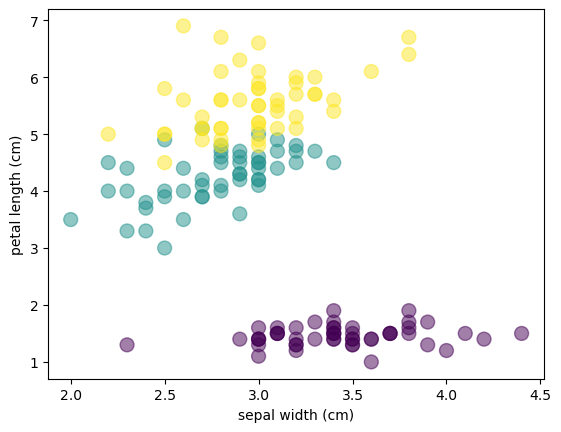

(1, 'sepal width (cm)') (3, 'petal width (cm)')


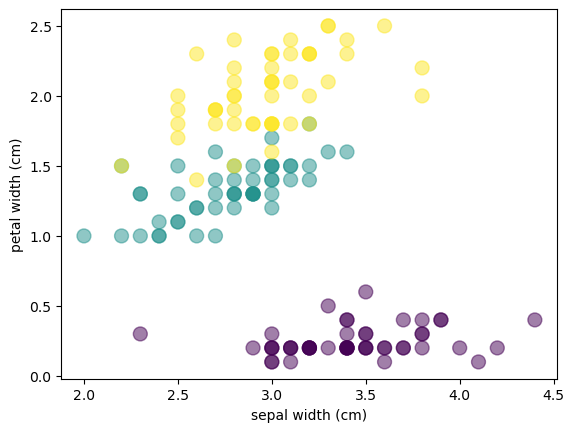

(2, 'petal length (cm)') (3, 'petal width (cm)')


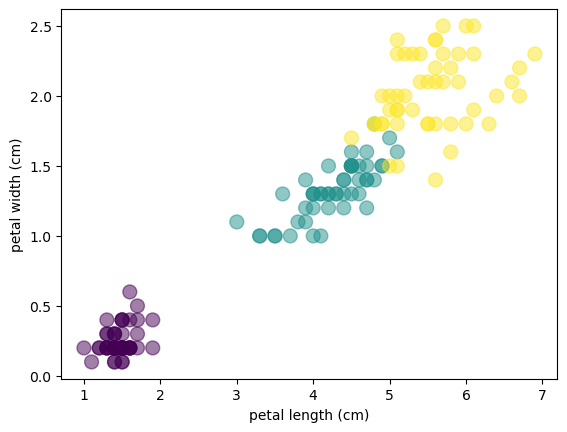

In [18]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print (i, j)
    draw_scatter(iris.data, iris.target, i[0], j[0])

## ML Technique 1: Supervised Learning
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [ ]:
### Instantiate K-NN Classifier
# Note: no internal model constructed
# Class is computed from a simple majority vote of the nearest neighbors of each point
# clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [19]:
# Instantiate Decision Tree classifier
clf = tree.DecisionTreeClassifier()

In [20]:
clf

DecisionTreeClassifier()

In [21]:
print ('feature names : ',iris.feature_names)
# print(iris.data)
print ('label names: ',iris.target_names)
print('labels : ',iris.target)

feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
label names:  ['setosa' 'versicolor' 'virginica']
labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Cross-validation and model evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
https://scikit-learn.org/stable/modules/model_evaluation.html  

In [25]:
def draw_confusion_matrix(y_test, y_pred, display_labels=None):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
    disp.plot()
    plt.show()

In [22]:
# K-fold cross-validator construction
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [29]:
for train_index, test_index in kf.split(iris.data):
    print(train_index, test_index)

[  0   1   2   3   5   6   7   9  10  11  12  14  15  16  17  18  19  21
  22  23  25  26  27  29  30  32  34  35  38  39  40  41  43  44  47  48
  49  50  51  52  53  54  55  56  57  58  60  61  62  64  65  66  67  68
  69  70  71  73  74  75  76  77  78  79  80  81  82  83  84  85  86  89
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107 108 109
 110 111 113 114 115 118 119 120 122 123 124 125 126 128 129 130 131 134
 136 137 139 140 142 143 144 145 146 147 148 149] [  4   8  13  20  24  28  31  33  36  37  42  45  46  59  63  72  87  88
  90 104 112 116 117 121 127 132 133 135 138 141]
[  1   2   3   4   6   7   8  10  11  12  13  14  15  17  18  20  21  22
  24  25  26  27  28  30  31  32  33  34  36  37  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  54  55  56  57  58  59  61  63  64  66
  67  68  69  70  71  72  73  74  75  76  77  78  80  81  83  84  85  87
  88  90  92  94  95  96  97  98  99 100 102 103 104 105 106 107 108 109
 111 112 113 116 117 118

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



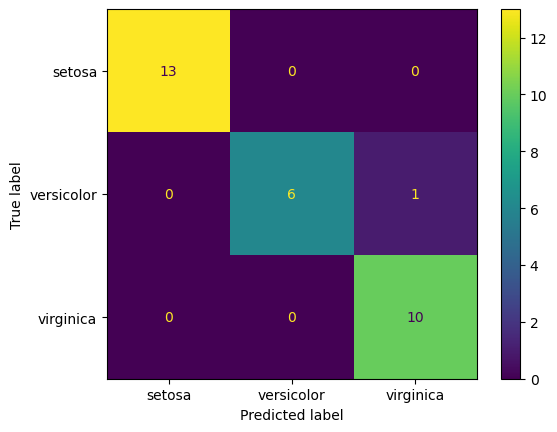

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



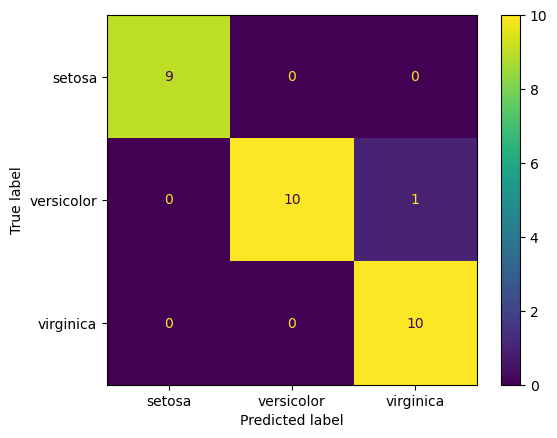

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



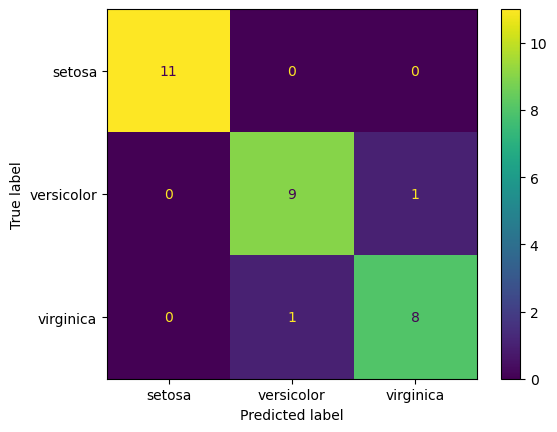

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      0.92      0.92        13
   virginica       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



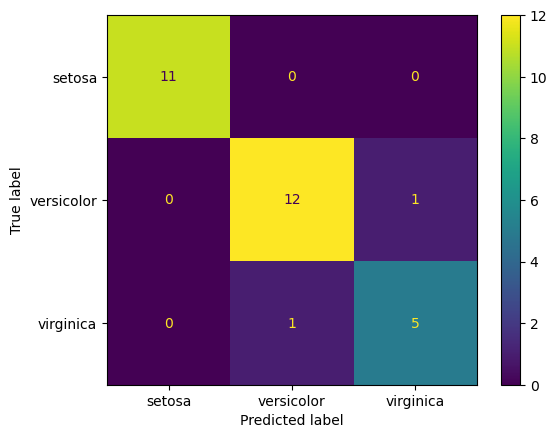

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.91      0.95        11
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



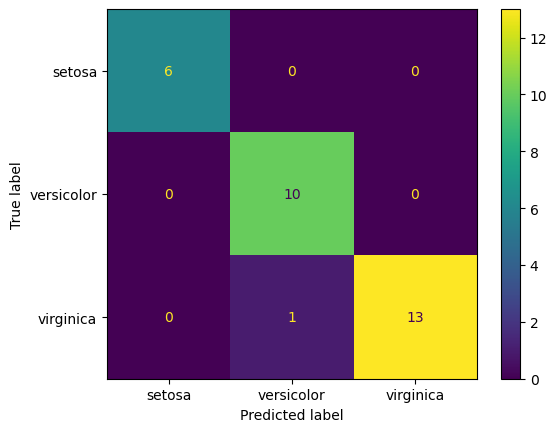

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



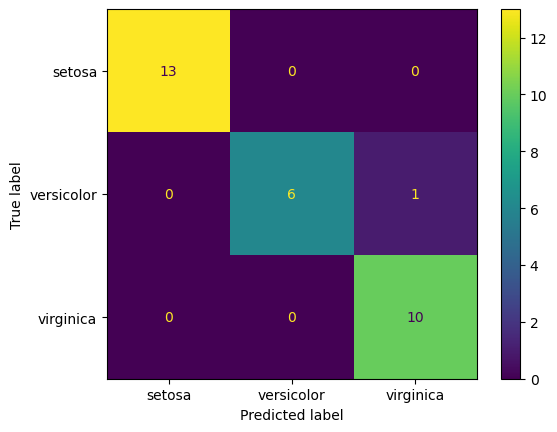

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



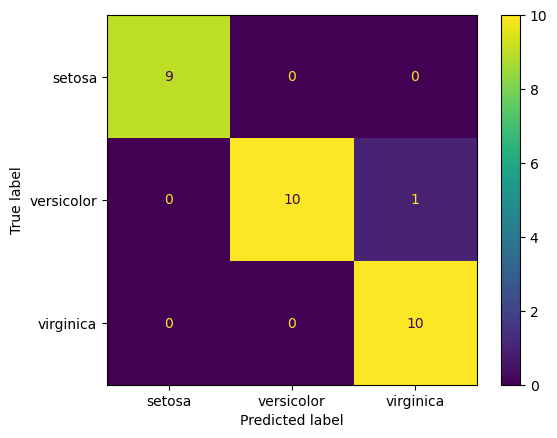

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



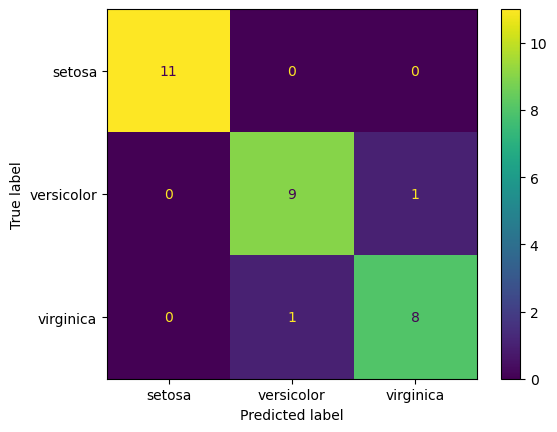

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      0.92      0.92        13
   virginica       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



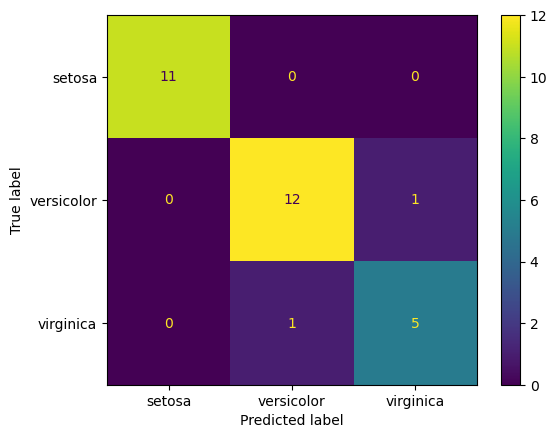

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.91      0.95        11
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



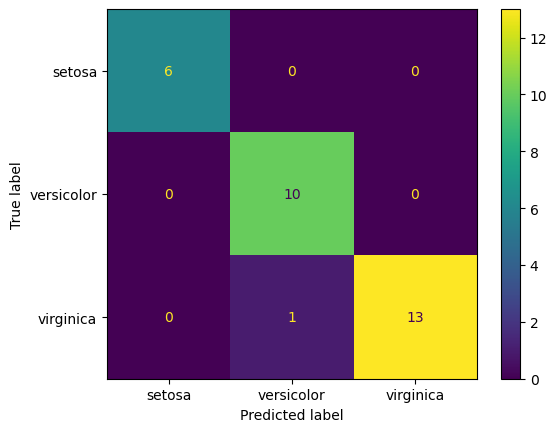

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



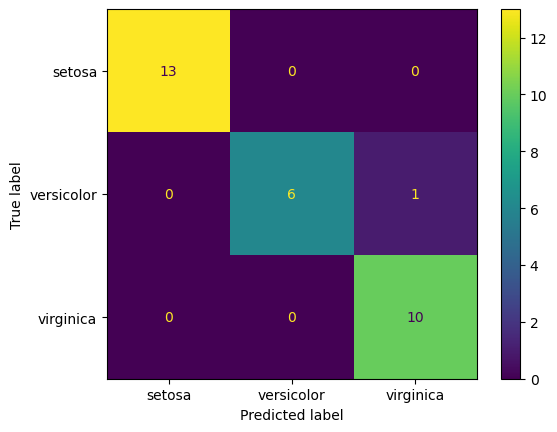

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



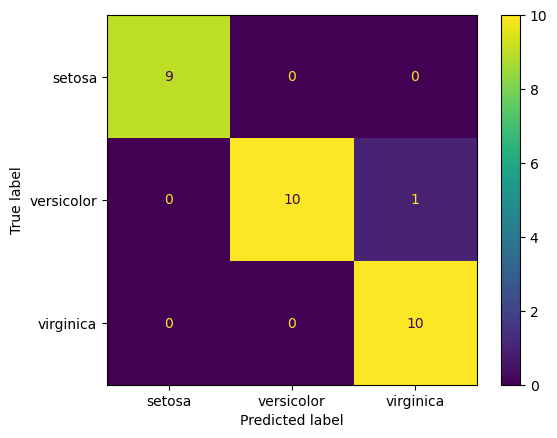

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



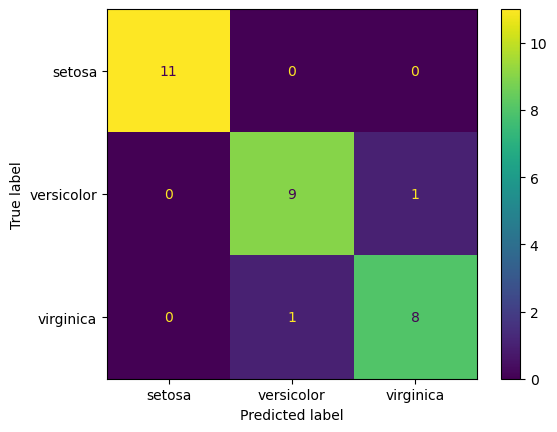

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      0.92      0.92        13
   virginica       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



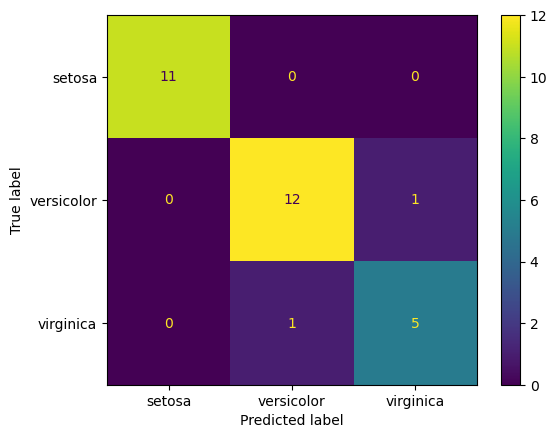

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.83      0.91      0.87        11
   virginica       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30



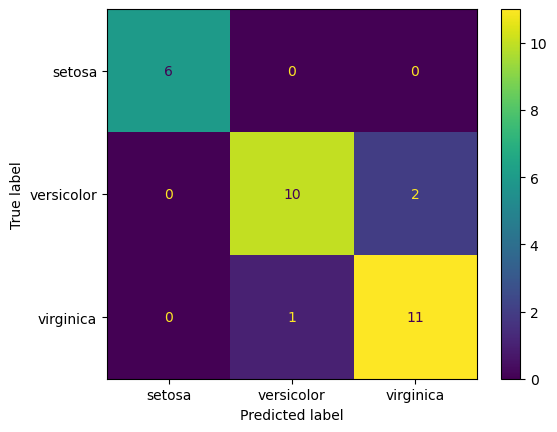

In [34]:
cv_scores = []
# K-fold cross validation and performance evaluation

for max_depth in [5,10,15]:
    accuracy_scores = []
    for train_index, test_index in kf.split(iris.data):
        clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        # draw_scatter(X_test, x_feature=2, y_feature=3)
        print("TRAIN SAMPLE SIZE:", len(train_index))
        print("TEST SAMPLE SIZE:", len(test_index))
        X_train, X_test = iris.data[train_index], iris.data[test_index]
        y_train, y_test = iris.target[train_index], iris.target[test_index]

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)

        print ('Prediction: ', y_pred)
        print ('Correct:    ', y_test)
        print ('Accuracy:', accuracy_score(y_pred, y_test))
        print (classification_report(y_test, y_pred, target_names=iris.target_names))
        
        draw_confusion_matrix(y_pred,y_test,iris.target_names)
        acc = accuracy_score(y_pred,y_test)
        accuracy_scores.append(acc)
    cv_scores.append({'acc': np.mean(accuracy_scores), 'max_depth' : max_depth})        

In [35]:
cv_scores

[{'acc': 0.9533333333333334, 'max_depth': 5},
 {'acc': 0.9533333333333334, 'max_depth': 10},
 {'acc': 0.9400000000000001, 'max_depth': 15}]

In [37]:
accuracy_scores

[0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9]

In [36]:
'{:.2f} +/- {:.3f}'.format(np.mean(accuracy_scores), np.std(accuracy_scores))

'0.94 +/- 0.025'

## ML Technique 2: Unsupervised Learning
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [38]:
# unsupervised k-means 
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(iris.data)
k_means_label = k_means.labels_

In [39]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

### Plot feature combindations + clusters (k = 2)

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


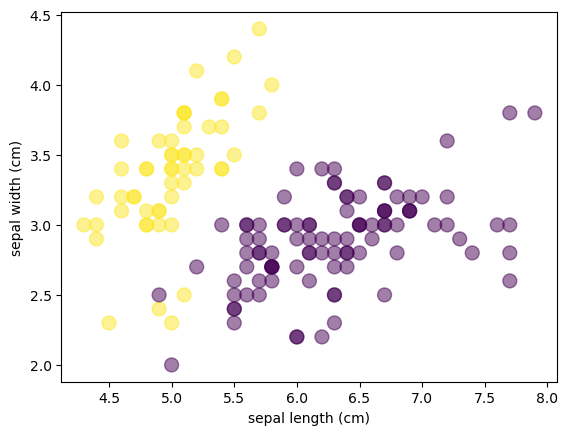

(0, 'sepal length (cm)') (2, 'petal length (cm)')


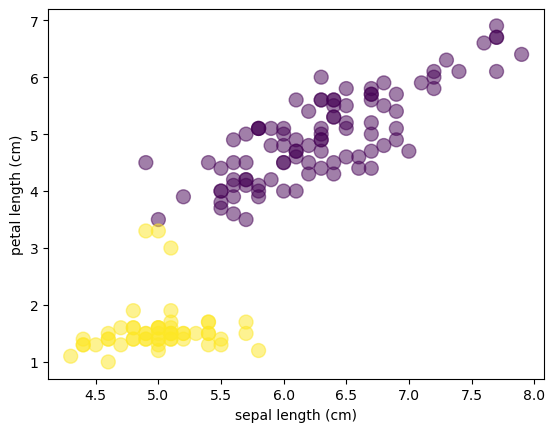

(0, 'sepal length (cm)') (3, 'petal width (cm)')


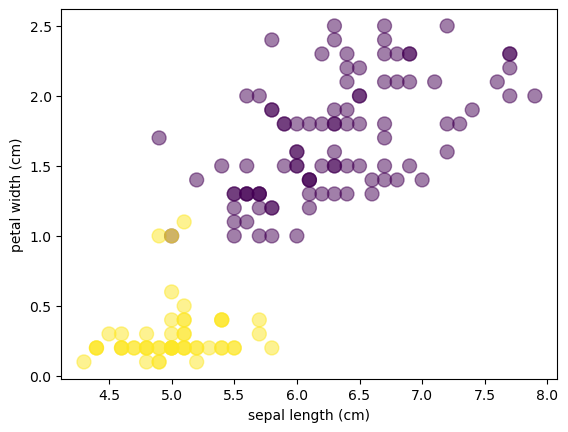

(1, 'sepal width (cm)') (2, 'petal length (cm)')


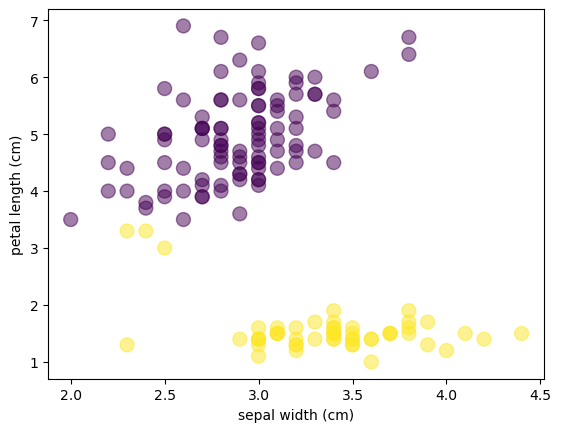

(1, 'sepal width (cm)') (3, 'petal width (cm)')


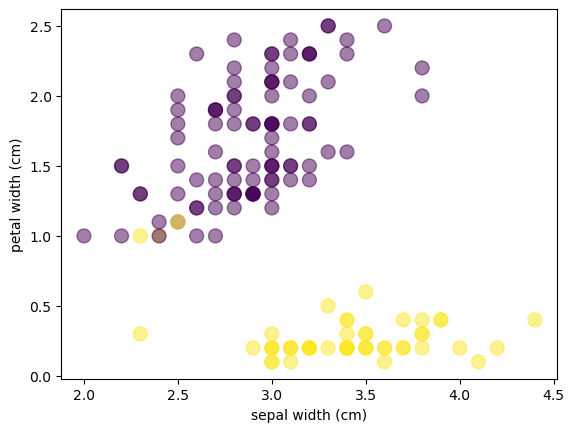

(2, 'petal length (cm)') (3, 'petal width (cm)')


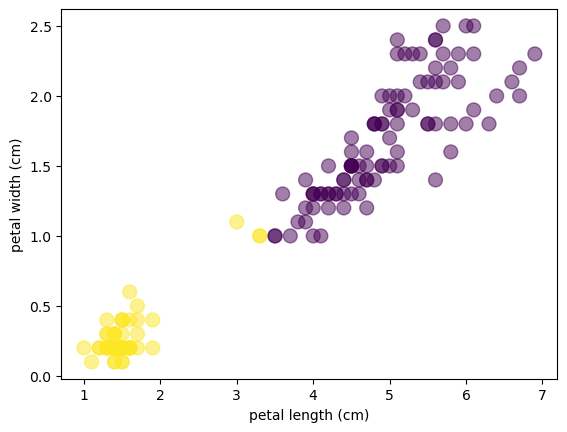

In [40]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print(i,j)
    draw_scatter(iris.data, k_means_label, i[0], j[0])

In [41]:
# unsupervised k-means 
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(iris.data)
k_means_label = k_means.labels_

### Plot feature combindations + clusters (k = 4)

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


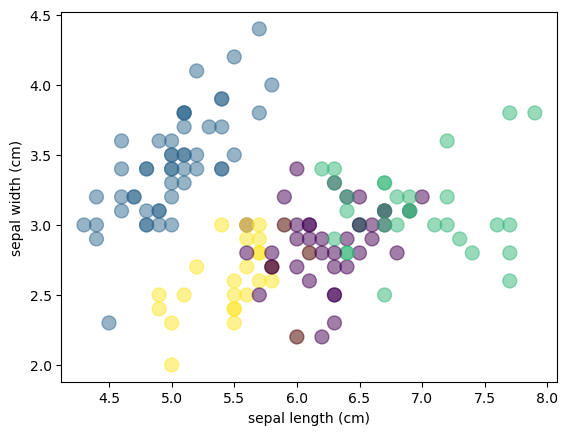

(0, 'sepal length (cm)') (2, 'petal length (cm)')


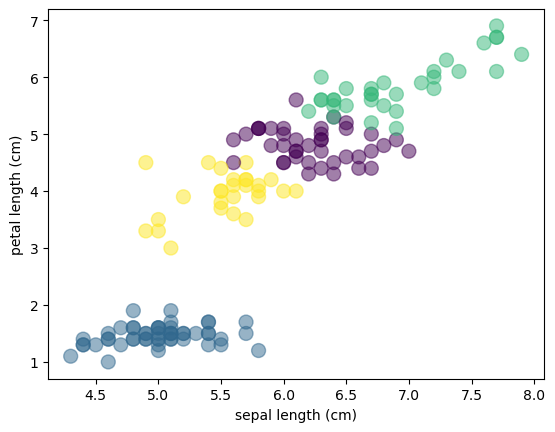

(0, 'sepal length (cm)') (3, 'petal width (cm)')


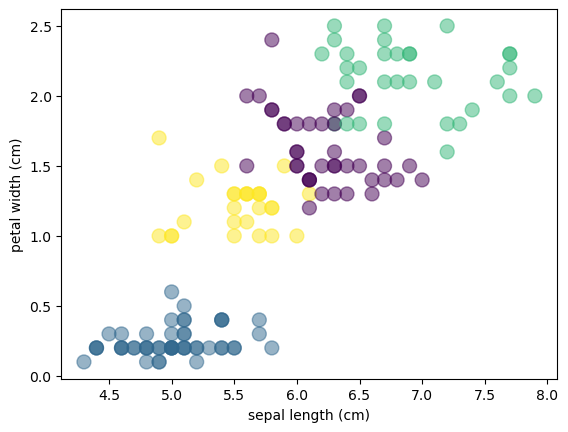

(1, 'sepal width (cm)') (2, 'petal length (cm)')


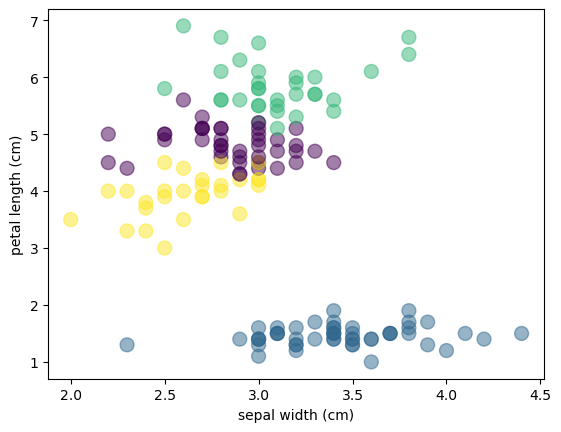

(1, 'sepal width (cm)') (3, 'petal width (cm)')


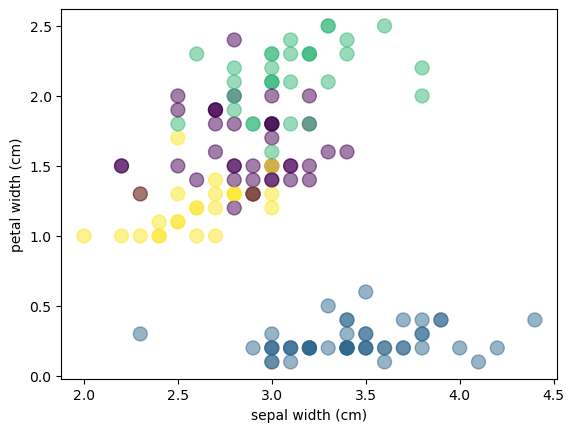

(2, 'petal length (cm)') (3, 'petal width (cm)')


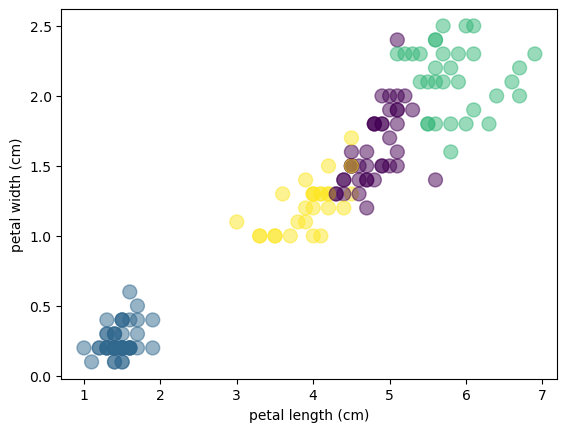

In [42]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print(i,j)
    draw_scatter(iris.data, k_means_label, i[0], j[0])

### Unsupervised learning evaluation: elbow plot

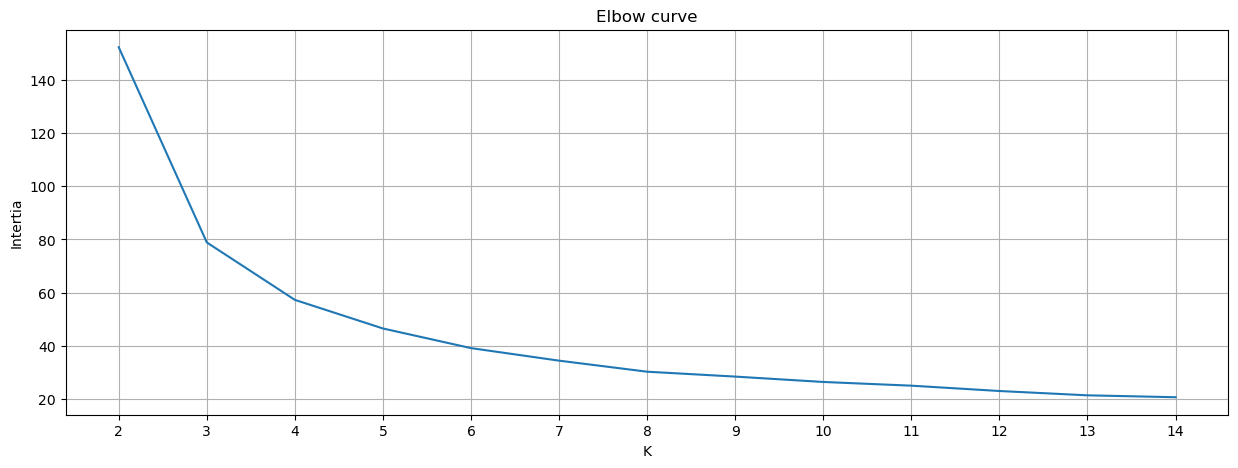

In [43]:
inertias = []
for k in range(2, 15):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), inertias)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(list(range(2, 15)))
plt.xlabel('K')
_ = plt.ylabel('Intertia')

In [ ]:
# Sources:
# http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/18_IntermediateSklearn
# http://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# http://scikit-learn.org/stable/auto_examples/plot_confusion_matrix.html#example-plot-confusion-matrix-py
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html